In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd "/content/gdrive/My Drive/face_recognition/"

/content/gdrive/My Drive/face_recognition


In [5]:
!pwd

/content/gdrive/My Drive/face_recognition


In [6]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 47kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=8f3cee64049d114efcffc5bc393c8dafbb990bff5dd1ce41f3245401cd5b82e3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [7]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

image = cv2.imread('tom.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

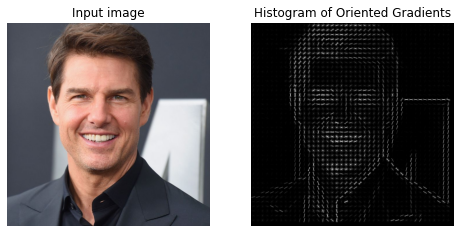

In [8]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),cells_per_block=(1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [9]:
len(fd)

14792

In [10]:
image.shape

(700, 700, 3)

Face Detection

In [11]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2

%matplotlib inline

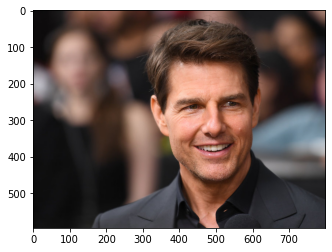

In [18]:
image = cv2.imread('tom2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [19]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print(f"Found {number_of_faces} face(s) in the input image.")

Found 1 face(s) in the input image.


Found 2 face(s) in the input image.


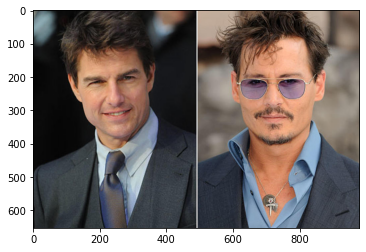

In [24]:
image = cv2.imread('tom-cruise-johnny-depp.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print(f"Found {number_of_faces} face(s) in the input image.")

A Face is located at pixel location top: 613, left: 167, bottom: 835, right: 390
A Face is located at pixel location top: 142, left: 142, bottom: 365, right: 365


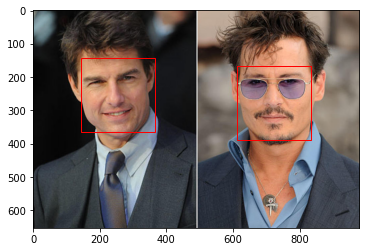

In [25]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left = face_location
  x,y,w,h = left, top, right, bottom
  print(f"A Face is located at pixel location top: {x}, left: {y}, bottom: {w}, right: {h}")

  rect = Rectangle((x,y), w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
  
plt.show()

Face Recognition

In [26]:
image = cv2.imread('tom2.jpg')
face_demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('tom.jpg')
tom = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('johnny.jpg')
johnny = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
tom_encoding = face_recognition.face_encodings(tom)[0]
johnny_encoding = face_recognition.face_encodings(tom)[0]

known_face_encodings = [face_demo_encoding, tom_encoding, johnny_encoding]

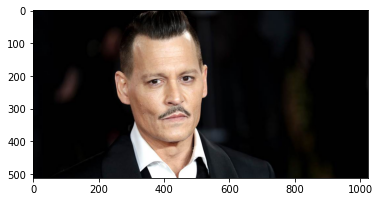

In [29]:
image = cv2.imread('johnny2.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [43]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
	results=[]
	for known_face_encoding in known_face_encodings:
		d = distance.euclidean(known_face_encoding, unknown_face_encoding)
		results.append(d)

	threshold=0.6
	results = np.array(results)<=threshold

	name='Johnny Depp'
  
	if results[0]:
        name = "Face demo image"
	elif results[1]:
        name = "Tom Cruise"

print(f"Found {name} in the photo!")

Found Johnny Depp in the photo!


Playing with facial Landmarks

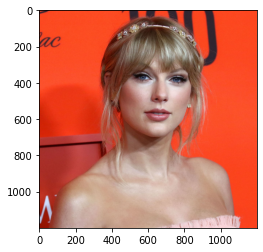

In [49]:
image = cv2.imread('taylor_swift.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [50]:
face_landmarks_list = face_recognition.face_landmarks(image)

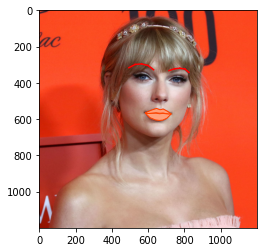

In [51]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    left_eyebrow_pts = face_landmarks['left_eyebrow']
    pre_x, pre_y = left_eyebrow_pts[0]
    for (x,y) in  left_eyebrow_pts[1:]:
      l = mlines.Line2D([pre_x, x],[pre_y, y],color="red")
      ax.add_line(l)
      pre_x, pre_y = x,y

    right_eyebrow_pts = face_landmarks['right_eyebrow']
    pre_x, pre_y = right_eyebrow_pts[0]
    for (x,y) in  right_eyebrow_pts[1:]:
      l = mlines.Line2D([pre_x, x],[pre_y, y],color="red")
      ax.add_line(l)
      pre_x, pre_y = x,y

    p = Polygon(face_landmarks['top_lip'],facecolor='lightsalmon', edgecolor = 'orangered')
    ax.add_patch(p)

    p = Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon', edgecolor = 'orangered')
    ax.add_patch(p)

plt.show()